In [7]:
import pandas as pd

# Read n rows from the embedded data
df = pd.read_csv('../data/vec_data.csv',nrows=1000, skiprows = 1)
label_vectors = pd.read_csv('../data/label_embeddings.csv')

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [8]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
label_scaled = min_max_scaler.transform(label_vectors.to_numpy())

C:\Users\adamv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [15]:
import numpy as np
from sklearn.manifold import TSNE

# Use T-sne to get the data from 128 to 2 dimensions
data = np.append(X_scaled, label_scaled, axis=0)
data_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data)
X_embedded = data_embedded[:-4,:]
labels_embedded = data_embedded[-4:,:]

array([[-36.910866  , -27.802595  ],
       [  8.320587  , -23.684858  ],
       [-11.545743  , -25.31416   ],
       ...,
       [ -0.17709205, -28.722404  ],
       [  0.14455503, -28.49119   ],
       [  1.6816918 , -27.870754  ]], dtype=float32)

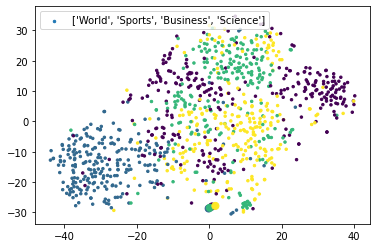

In [17]:
import matplotlib.pyplot as plt
labels = ["World","Sports","Business","Science"]

# Plot 2 dimensional data
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = y, s = 6, label = labels)
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 50)
plt.legend();

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.metrics import confusion_matrix as cf, accuracy_score as acc_score

pred = np.argmax(cs(X_embedded, labels_embedded), axis = 1)
print(cf(y, pred))
print(acc_score(y,pred))

[[  1  83   0 195]
 [  0 233   0  12]
 [  0 138   0  90]
 [  1  63   0 184]]
0.418


In [ ]:
from sklearn.cluster import KMeans
X_embedded
labels_embedded
n = len(labels_embedded)
kmeans = KMeans(n_clusters = n, init = label_vectors).fit(X)
random_kmeans = KMeans(n_clusters = n).fit(X)


C:\Users\adamv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


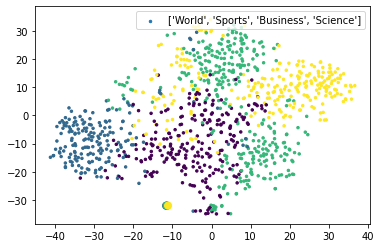

In [ ]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = kmeans.labels_, s = 6, label = labels)
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 50)
plt.legend();

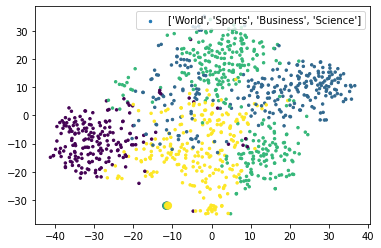

In [ ]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = random_kmeans.labels_, s = 6, label = labels)
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 50)
plt.legend();